In [29]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [30]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [31]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [32]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


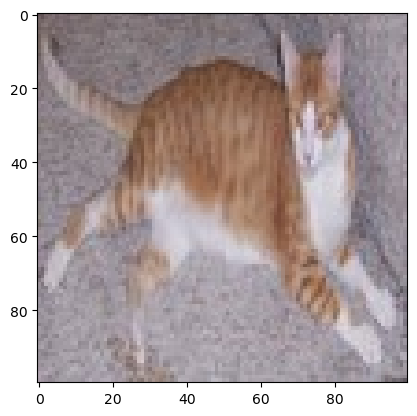

In [33]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [34]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [35]:

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [36]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)


Epoch 1/5
32/32 [==============================] - 14s 343ms/step - loss: 0.7271 - accuracy: 0.5450
Epoch 2/5
32/32 [==============================] - 11s 356ms/step - loss: 0.6615 - accuracy: 0.6190
Epoch 3/5
32/32 [==============================] - 11s 356ms/step - loss: 0.5821 - accuracy: 0.7060
Epoch 4/5
32/32 [==============================] - 11s 352ms/step - loss: 0.5247 - accuracy: 0.7285
Epoch 5/5
32/32 [==============================] - 12s 389ms/step - loss: 0.4900 - accuracy: 0.7565


In [37]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 46ms/step - loss: 0.5845 - accuracy: 0.6975


[0.5845287442207336, 0.6974999904632568]

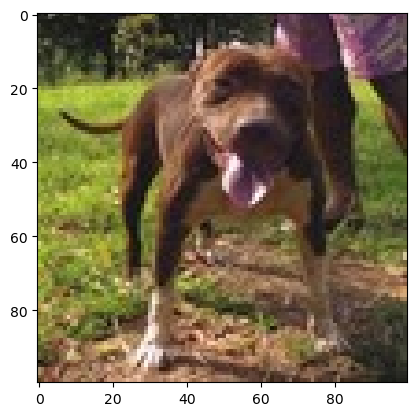

1/1 [==============================] - 0s 143ms/step
Our model says it is a : dog


In [38]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)